# Visualization of data to catch meaningfull insights.
IPL data visualization for comparison of score and wicket drop outs of both teams.

##### Import required librarires

In [1]:
import numpy as np       # For statistical analysis of data
import pandas as pd      # For data processing
import matplotlib.pyplot as plt    # For data visualization
import warnings 
warnings.filterwarnings('ignore')

##### Read data from csv file and check first five records

In [2]:
df = pd.read_csv('all.csv')
df.head()

,match_name,inning,ball,non_striker,batsman,bowler,extra_runs,batsman_run,total_runs,extras,player_out,elimination_kind,fielders_caught,umpires_1,umpires_2,player_of_match,winner,city,venue,dates
0,MI vs RCB 2021-04-09,1st innings,0.1,CA Lynn,RG Sharma,Mohammed Siraj,0,2,2,NaN,NaN,NaN,NaN,KN Ananthapadmanabhan,Nitin Menon,HV Patel,Royal Challengers Bangalore,Chennai,"MA Chidambaram Stadium, Chepauk, Chennai",4/9/21
1,MI vs RCB 2021-04-09,1st innings,0.2,CA Lynn,RG Sharma,Mohammed Siraj,0,0,0,NaN,NaN,NaN,NaN,KN Ananthapadmanabhan,Nitin Menon,HV Patel,Royal Challengers Bangalore,Chennai,"MA Chidambaram Stadium, Chepauk, Chennai",4/9/21
2,MI vs RCB 2021-04-09,1st innings,0.3,CA Lynn,RG Sharma,Mohammed Siraj,0,0,0,NaN,NaN,NaN,NaN,KN Ananthapadmanabhan,Nitin Menon,HV Patel,Royal Challengers Bangalore,Chennai,"MA Chidambaram Stadium, Chepauk, Chennai",4/9/21
3,MI vs RCB 2021-04-09,1st innings,0.4,CA Lynn,RG Sharma,Mohammed Siraj,0,2,2,NaN,NaN,NaN,NaN,KN Ananthapadmanabhan,Nitin Menon,HV Patel,Royal Challengers Bangalore,Chennai,"MA Chidambaram Stadium, Chepauk, Chennai",4/9/21
4,MI vs RCB 2021-04-09,1st innings,0.5,CA Lynn,RG Sharma,Mohammed Siraj,0,0,0,NaN,NaN,NaN,NaN,KN Ananthapadmanabhan,Nitin Menon,HV Patel,Royal Challengers Bangalore,Chennai,"MA Chidambaram Stadium, Chepauk, Chennai",4/9/21


##### Check list of features

In [3]:
df.columns

Index(['match_name', 'inning', 'ball', 'non_striker', 'batsman', 'bowler',
       'extra_runs', 'batsman_run', 'total_runs', 'extras', 'player_out',
       'elimination_kind', 'fielders_caught', 'umpires_1', 'umpires_2',
       'player_of_match', 'winner', 'city', 'venue', 'dates'],
      dtype='object')

In [4]:
# Get records of first inning

df.head(124).ball

0       0.1
1       0.2
2       0.3
3       0.4
4       0.5
       ... 
119    19.2
120    19.3
121    19.4
122    19.5
123    19.6
Name: ball, Length: 124, dtype: float64

In [5]:
# Get total score of first inning after each ball.

np.cumsum(df.head(124).total_runs)

0        2
1        2
2        2
3        4
4        4
      ... 
119    158
120    158
121    158
122    158
123    159
Name: total_runs, Length: 124, dtype: int64

Text(0, 0.5, 'runs')

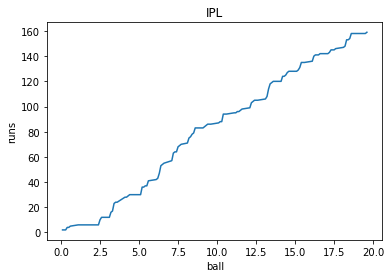

In [6]:
# Plot runs of first inning

plt.plot(df.head(124).ball,np.cumsum(df.head(124).total_runs))
plt.title('IPL')
plt.xlabel('ball')
plt.ylabel('runs')

In [7]:
# Get Wicket drop out balls of first inning

df1 = df.head(124)
df1.player_out.fillna(0,inplace=True)
f=df1.player_out.where(df1.player_out!=0,2)
fallofwickets =f.where(f==2,df1.total_runs.cumsum(),inplace=True)
fallofwickets =f.where(f!=2,np.nan,inplace=True)
f

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
119    158
120    NaN
121    158
122    NaN
123    159
Name: player_out, Length: 124, dtype: object

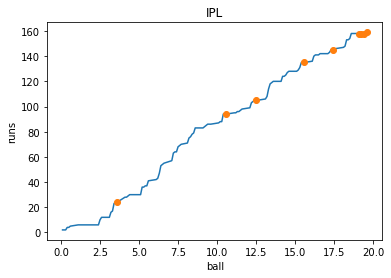

In [8]:
# Visualize runs and wickets of first inning

plt.plot(df.head(124).ball,np.cumsum(df.head(124).total_runs))
plt.title('IPL')
plt.xlabel('ball')
plt.ylabel('runs')
plt.plot(df1.ball,f,'o')

In [9]:
# Get data of second inning

df2 = df[124:250]
df2.head()

,match_name,inning,ball,non_striker,batsman,bowler,extra_runs,batsman_run,total_runs,extras,player_out,elimination_kind,fielders_caught,umpires_1,umpires_2,player_of_match,winner,city,venue,dates
124,MI vs RCB 2021-04-09,2nd innings,0.1,V Kohli,Washington Sundar,TA Boult,0,0,0,NaN,NaN,NaN,NaN,KN Ananthapadmanabhan,Nitin Menon,HV Patel,Royal Challengers Bangalore,Chennai,"MA Chidambaram Stadium, Chepauk, Chennai",4/9/21
125,MI vs RCB 2021-04-09,2nd innings,0.2,V Kohli,Washington Sundar,TA Boult,0,0,0,NaN,NaN,NaN,NaN,KN Ananthapadmanabhan,Nitin Menon,HV Patel,Royal Challengers Bangalore,Chennai,"MA Chidambaram Stadium, Chepauk, Chennai",4/9/21
126,MI vs RCB 2021-04-09,2nd innings,0.3,V Kohli,Washington Sundar,TA Boult,5,0,5,wides,NaN,NaN,NaN,KN Ananthapadmanabhan,Nitin Menon,HV Patel,Royal Challengers Bangalore,Chennai,"MA Chidambaram Stadium, Chepauk, Chennai",4/9/21
127,MI vs RCB 2021-04-09,2nd innings,0.4,V Kohli,Washington Sundar,TA Boult,0,0,0,NaN,NaN,NaN,NaN,KN Ananthapadmanabhan,Nitin Menon,HV Patel,Royal Challengers Bangalore,Chennai,"MA Chidambaram Stadium, Chepauk, Chennai",4/9/21
128,MI vs RCB 2021-04-09,2nd innings,0.5,V Kohli,Washington Sundar,TA Boult,0,1,1,NaN,NaN,NaN,NaN,KN Ananthapadmanabhan,Nitin Menon,HV Patel,Royal Challengers Bangalore,Chennai,"MA Chidambaram Stadium, Chepauk, Chennai",4/9/21


In [10]:
# Get Wicket drop uot balls of second inning

df2.player_out.fillna(0,inplace=True)

df2.player_out.where(df2.player_out==0,np.cumsum(df2.total_runs),inplace=True)
df2.player_out.where(df2.player_out!=0,np.nan,inplace=True)
df2.head()

,match_name,inning,ball,non_striker,batsman,bowler,extra_runs,batsman_run,total_runs,extras,player_out,elimination_kind,fielders_caught,umpires_1,umpires_2,player_of_match,winner,city,venue,dates
124,MI vs RCB 2021-04-09,2nd innings,0.1,V Kohli,Washington Sundar,TA Boult,0,0,0,NaN,NaN,NaN,NaN,KN Ananthapadmanabhan,Nitin Menon,HV Patel,Royal Challengers Bangalore,Chennai,"MA Chidambaram Stadium, Chepauk, Chennai",4/9/21
125,MI vs RCB 2021-04-09,2nd innings,0.2,V Kohli,Washington Sundar,TA Boult,0,0,0,NaN,NaN,NaN,NaN,KN Ananthapadmanabhan,Nitin Menon,HV Patel,Royal Challengers Bangalore,Chennai,"MA Chidambaram Stadium, Chepauk, Chennai",4/9/21
126,MI vs RCB 2021-04-09,2nd innings,0.3,V Kohli,Washington Sundar,TA Boult,5,0,5,wides,NaN,NaN,NaN,KN Ananthapadmanabhan,Nitin Menon,HV Patel,Royal Challengers Bangalore,Chennai,"MA Chidambaram Stadium, Chepauk, Chennai",4/9/21
127,MI vs RCB 2021-04-09,2nd innings,0.4,V Kohli,Washington Sundar,TA Boult,0,0,0,NaN,NaN,NaN,NaN,KN Ananthapadmanabhan,Nitin Menon,HV Patel,Royal Challengers Bangalore,Chennai,"MA Chidambaram Stadium, Chepauk, Chennai",4/9/21
128,MI vs RCB 2021-04-09,2nd innings,0.5,V Kohli,Washington Sundar,TA Boult,0,1,1,NaN,NaN,NaN,NaN,KN Ananthapadmanabhan,Nitin Menon,HV Patel,Royal Challengers Bangalore,Chennai,"MA Chidambaram Stadium, Chepauk, Chennai",4/9/21


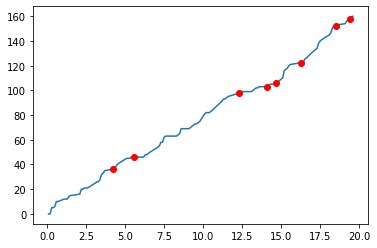

In [11]:
# Visualize plot of second inning

plt.plot(df2.ball,df2.total_runs.cumsum())
plt.plot(df2.ball,df2.player_out,'r--o')
plt.show()

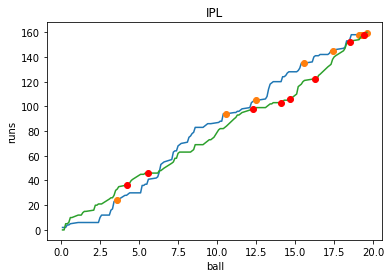

In [12]:
# Visualize plots of both innings 

plt.plot(df.head(124).ball,np.cumsum(df.head(124).total_runs))
plt.title('IPL')
plt.xlabel('ball')
plt.ylabel('runs')
plt.plot(df1.ball,f,'o')

plt.plot(df2.ball,df2.total_runs.cumsum())
plt.plot(df2.ball,df2.player_out,'r--o')
plt.savefig('fallofwickets.jpeg',dpi=200)